# Cryptocurrency (Bitcoin) Sentiment Analysis

# 1.0 Business Understanding
### 1.1 Overview

The proposed project aims to create a sophisticated system that empowers cryptocurrency investors with a data-driven approach for making informed investment decisions in the volatile Bitcoin (BTC) market.
This system will combine sentiment analysis and price trend analysis to develop an optimized investment strategy that maximizes returns while minimizing risks.

The motivation behind this project is twofold. Firstly, the cryptocurrency market, particularly Bitcoin, has witnessed significant growth and attracted considerable interest from investors worldwide. However, its inherent volatility and complexity make it challenging to navigate without data-driven insights. Secondly, the project addresses the growing need for investment strategies that harness the power of data analytics and sentiment analysis to thrive in the evolving landscape of digital currencies.

### 1.2 Problem Statement
In the dynamic landscape of cryptocurrency investments, where market sentiment can rapidly shift and prices are highly volatile, there is a pressing need for an effective and data-driven investment strategy for Bitcoin (BTC). 
The problem at hand revolves around developing a comprehensive system that combines sentiment analysis and price trend analysis to address the following key challenges:

 1: Market Sentiment Analysis
The cryptocurrency market is significantly influenced by public sentiment, news articles, social media discussions, and investor sentiment. The challenge is to accurately gauge and analyze this sentiment in real-time to identify trends, emerging patterns, and the overall market sentiment regarding Bitcoin.

2: Price Trend Analysis
Bitcoin's price movements are characterized by extreme fluctuations and rapid changes. Analyzing historical price data and identifying meaningful trends and patterns that can inform investment decisions is a complex task. This challenge involves the development of robust price trend analysis algorithms.

 3: Data Integration
Integrating and processing vast and diverse datasets, including social media posts, news articles, price data, and sentiment scores, in a coherent and efficient manner is a fundamental challenge. The project must ensure seamless data integration to provide a holistic view of the Bitcoin market.

 4: Investment Strategy Optimization
The ultimate goal is to design an investment strategy that optimizes returns while managing risks. This entails developing algorithms that can leverage both sentiment analysis and price trend analysis to inform buy/sell decisions.

### 1.3 Project Objectives


The primary objective of this project is to create a system that leverages the power of natural language processing (NLP) and machine learning to:

1.Combine sentiment analysis with price trend analysis to formulate an optimized investment strategy for Bitcoin.

2.Maximize returns on Bitcoin investments while minimizing exposure to market risks.

### Project Objectives:
- Develop a model to gauge and predict public sentiment regarding Bitcoin, providing real-time insights to investors.
- Understand the relationship between sentiment shifts and Bitcoin price movements to predict price trends.
- Based on sentiment analysis and historical data, propose strategies to manage investment risks.
- Create actionable strategies for entry, holding, and exit points in Bitcoin investments based on sentiment and price trends.
- Develop a system to continuously monitor sentiments and adjust investment strategies in real-time.
### Business Questions:
- How does public sentiment, as captured on Reddit, correlate with Bitcoin's price?
- What are the most prevalent topics or discussions in the Bitcoin subreddit, and how do they relate to Bitcoin's market behavior?
- Can significant market events (like sharp price increases or declines) be linked with notable shifts in sentiment on Reddit?
- How does the volume and sentiment of discussions change with fluctuations in Bitcoin's price, trading volume, or market capitalization?
- Are there specific sentiment patterns or topics that emerge during significant market milestones (e.g., when Bitcoin reaches new highs or experiences sudden drops)?
- Is there a noticeable time lag between shifts in public sentiment and subsequent market reactions?

### 1.4 Metric of Success

- **ROC-AUC score**

For gauging the overall predictive power of our final model.


- **F1-score**

**Minimizing False Positives:**

Minimizing false positives means you are cautious about making an investment decision unless you are highly confident that a trading signal is accurate. This approach minimizes the risk of entering trades that don't perform as expected.

**Minimizing False Negatives:**

Minimizing false negatives means you are more open to taking trading positions, even if there's a chance of some signals being inaccurate. This approach can help you capture more potential profit opportunities.

# 2.0 Data Understanding

Our first dataset was obtained from [SocialGrep](https://socialgrep.com/datasets/reddit-r-bitcoin-data-for-jun-2022).

**Reddit_Comments:**

**This dataset captures public sentiment through comments in the Bitcoin subreddit for June 2022. With 170,032 individual comments, it offers a granular view of public discussions and reactions related to Bitcoin in this specific month.**

**Contains data related to Reddit comments in the r/Bitcoin subreddit, with columns:**
- type: Type of the data (in this case, "comment").
- id: Unique identifier for the comment.
- subreddit.id and subreddit.
- subreddit.name - The name of the subreddit. (String)
- subreddit.nsfw - Whether the subreddit is NSFW. (Boolean)
- created_utc: UTC timestamp for when the comment was created.
- permalink: Link to the comment on Reddit.
- body: The text content of the comment.
- sentiment: Sentiment score of the comment.
- score: The score (upvotes minus downvotes) of the comment.



Our second dataset was also obtained from [SocialGrep](https://socialgrep.com/datasets/reddit-r-bitcoin-data-for-jun-2022).

**Reddit_Posts:**

**This dataset comprises 7,541 posts from the Bitcoin subreddit for June 2022. It provides insights into the main topics, discussions, and sentiment concerning Bitcoin during this month.**
**Contains data related to Reddit posts in the r/Bitcoin subreddit, with columns:**
- type: Type of the data (in this case, "post").
- id: Unique identifier for the post.
- subreddit.id and subreddit.name: Information about the subreddit.
- created_utc: UTC timestamp for when the post was created.
- permalink and domain: Links related to the post.
- url: URL of the post.
- selftext: The text content of the post.
- title: The title of the post.
- score: The score (upvotes minus downvotes) of the post.

Our third dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrency-historical-prices-coingecko/versions/57?resource=download&select=bitcoin.csv)

**Bitcoin_Prices:**

**This dataset provides a historical view of Bitcoin's market metrics spanning from January 1, 2015, to November 16, 2022. It contains data on Bitcoin's price, trading volume, and market capitalization across 2,876 records.**
**Data columns:**
- date: The date of the data.
- price: The price of Bitcoin on that day.
- total_volume: The total trading volume of Bitcoin on that day.
- market_cap: The market capitalization of Bitcoin on that day.
- coin_name: The name of the cryptocurrency (which is Bitcoin for all rows).


In [2]:
!pip install emoji

  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/96/c6/0114b2040a96561fd1b44c75df749bbd3c898bf8047fb5ce8d7590d2dee6/emoji-2.8.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/358.9 kB ? eta -:--:--
   --- ------------------------------------ 30.7/358.9 kB 1.4 MB/s eta 0:00:01
   ------ -------------------------------- 61.4/358.9 kB 825.8 kB/s eta 0:00:01
   ------------ --------------------------- 112.6/358.9 kB 1.1 MB/s eta 0:00:01
   ------------------- -------------------- 174.1/358.9 kB 1.2 MB/s eta 0:00:01
   ----------------------------- ---------- 266.2/358.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  358.4/358.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 358.9/358.9 kB 1.6 MB/s eta 0:00:00


In [3]:
# importing necessary libraries

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import emoji
from wordcloud import WordCloud
# Import the combined dictionary from text_expansions.py
from text_expansions import combined_contractions
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)




ModuleNotFoundError: No module named 'wordcloud'

In [67]:
# Load the comments dataset
comments_df = pd.read_csv("Data/reddit-r-bitcoin-data-for-jun-2022-comments.csv")
comments_df.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,iedz93k,2s3qj,bitcoin,False,1656633593,https://old.reddit.com/r/Bitcoin/comments/vomm4k/i_will_buy_01_every_day_we_are_under_20k_sell_me/iedz93k/,$28 fee. Godamn.,0.0000,8
1,comment,iedz79o,2s3qj,bitcoin,False,1656633569,https://old.reddit.com/r/Bitcoin/comments/vo066b/daily_discussion_june_30_2022/iedz79o/,[deleted],NaN,0
2,comment,iedz77w,2s3qj,bitcoin,False,1656633568,https://old.reddit.com/r/Bitcoin/comments/voj5kf/im_honestly_starting_to_lose_hope_for_these/iedz77w/,I still use cash daily but that’s because my girls strips and brings home about $4-$6k weekly and people still pay there rent with it. It’s very comforting have a few hundred grand in the safe for emergencies. Cash still is king,0.9050,3
3,comment,iedz6wb,2s3qj,bitcoin,False,1656633564,https://old.reddit.com/r/Bitcoin/comments/vo066b/daily_discussion_june_30_2022/iedz6wb/,[removed],NaN,1
4,comment,iedz64u,2s3qj,bitcoin,False,1656633554,https://old.reddit.com/r/Bitcoin/comments/vo066b/daily_discussion_june_30_2022/iedz64u/,Stfu you nerd 😂 go jerk off to Fantasy baseball while mommy makes you some sandwiches. Get a job,-0.1779,-1


In [68]:
# check the shape of the dataset
comments_df.shape

(170032, 10)

In [69]:
comments_df.sample(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
76925,comment,icpgw4e,2s3qj,bitcoin,False,1655472581,https://old.reddit.com/r/Bitcoin/comments/vdztmg/exchange_risk_vs_physical_risk_vs_digital_risk/icpgw4e/,"This is the magic of multisig, if one seed phrase becomes compromised your coins are not gone as you need more than one key. The bitcoin test net is really really useful for this stuff as you can prove it without risk of financial loss",0.4562,1
97523,comment,icem8sg,2s3qj,bitcoin,False,1655258755,https://old.reddit.com/r/Bitcoin/comments/vcipjw/hi_its_me_again_i_have_another_99_sats_for_you/icem8sg/,I❤LN 2!,NaN,1
55713,comment,icwk51k,2s3qj,bitcoin,False,1655607414,https://old.reddit.com/r/Bitcoin/comments/vfahih/moral_of_the_story_dont_buy_bitcoin/icwk51k/,"""Inflation makes people poor""\n\n[citation needed]",-0.4767,-3
101113,comment,iccg5jf,2s3qj,bitcoin,False,1655223886,https://old.reddit.com/r/Bitcoin/comments/valyrz/this_week_i_finally_did_it_i_had_over_1_bitcoin/iccg5jf/,"hell yes. bitcoin is one of the few assets that can be held by the user and not an intermediary. get those coins off your exchange and into cold storage, stat!",-0.3595,1
97013,comment,ices22e,2s3qj,bitcoin,False,1655261696,https://old.reddit.com/r/Bitcoin/comments/vcipjw/hi_its_me_again_i_have_another_99_sats_for_you/ices22e/,"Oh, me too! Me me me",NaN,1


In [70]:
#Load the posts dataset

post_df = pd.read_csv("Data/reddit-r-bitcoin-data-for-jun-2022-posts.csv")
post_df.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,vomm4k,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm4k/i_will_buy_01_every_day_we_are_under_20k_sell_me/,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sell me your cheap coin 👍,1071
1,post,vomdf8,2s3qj,bitcoin,False,1656632554,https://old.reddit.com/r/Bitcoin/comments/vomdf8/bitcoin_and_the_internet/,self.bitcoin,NaN,"I was thinking.. is it possible for the government to ban all bitcoin nodes, miners ect by working thogether with ISPs en detect miners/nodes. Or detect high energy use from miners? \r\n\r\nAnd is it always a good idea to make bitcoin on the internet? Internet as a network does not seem very 'decentralised'.. \r\n\r\nI thought of this when I read that the ECB is already working on their CBDC to make the CBDC work without internet.\r\n(and yes I understand that the ECB makes a CBDC for an illusion of decentralization, but that of course that is nonsense. I mean who else already has a CBDC… china)",Bitcoin and the internet,0
2,post,vomcjb,2s3qj,bitcoin,False,1656632478,https://old.reddit.com/r/Bitcoin/comments/vomcjb/learn_how_to_sign_a_message_with_your_bitcoin/,bitcointalk.org,https://bitcointalk.org/index.php?topic=990345.0,NaN,Learn how to sign a message with your Bitcoin address,6
3,post,vom29i,2s3qj,bitcoin,False,1656631661,https://old.reddit.com/r/Bitcoin/comments/vom29i/cryptocurrency_techs_security_weaknesses_could/,npr.org,https://www.npr.org/2022/06/21/1105815143/cryptocurrency-bitcoin-blockchain-security-tampering-darpa,NaN,Cryptocurrency tech's security weaknesses could compromise how it runs: DARPA : NPR,1
4,post,vom1cw,2s3qj,bitcoin,False,1656631586,https://old.reddit.com/r/Bitcoin/comments/vom1cw/deciphering_btc_hash/,self.bitcoin,NaN,"How long is a reasonable amount of time for BTC to transfer between wallets? I had a transaction get sent to me 4 hours ago. It shows the correct address in the hash, but BTC hasn’t hit my wallet yet.",Deciphering BTC Hash,0


In [71]:
post_df.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,vomm4k,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm4k/i_will_buy_01_every_day_we_are_under_20k_sell_me/,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sell me your cheap coin 👍,1071
1,post,vomdf8,2s3qj,bitcoin,False,1656632554,https://old.reddit.com/r/Bitcoin/comments/vomdf8/bitcoin_and_the_internet/,self.bitcoin,NaN,"I was thinking.. is it possible for the government to ban all bitcoin nodes, miners ect by working thogether with ISPs en detect miners/nodes. Or detect high energy use from miners? \r\n\r\nAnd is it always a good idea to make bitcoin on the internet? Internet as a network does not seem very 'decentralised'.. \r\n\r\nI thought of this when I read that the ECB is already working on their CBDC to make the CBDC work without internet.\r\n(and yes I understand that the ECB makes a CBDC for an illusion of decentralization, but that of course that is nonsense. I mean who else already has a CBDC… china)",Bitcoin and the internet,0
2,post,vomcjb,2s3qj,bitcoin,False,1656632478,https://old.reddit.com/r/Bitcoin/comments/vomcjb/learn_how_to_sign_a_message_with_your_bitcoin/,bitcointalk.org,https://bitcointalk.org/index.php?topic=990345.0,NaN,Learn how to sign a message with your Bitcoin address,6
3,post,vom29i,2s3qj,bitcoin,False,1656631661,https://old.reddit.com/r/Bitcoin/comments/vom29i/cryptocurrency_techs_security_weaknesses_could/,npr.org,https://www.npr.org/2022/06/21/1105815143/cryptocurrency-bitcoin-blockchain-security-tampering-darpa,NaN,Cryptocurrency tech's security weaknesses could compromise how it runs: DARPA : NPR,1
4,post,vom1cw,2s3qj,bitcoin,False,1656631586,https://old.reddit.com/r/Bitcoin/comments/vom1cw/deciphering_btc_hash/,self.bitcoin,NaN,"How long is a reasonable amount of time for BTC to transfer between wallets? I had a transaction get sent to me 4 hours ago. It shows the correct address in the hash, but BTC hasn’t hit my wallet yet.",Deciphering BTC Hash,0


In [72]:
post_df.tail(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
7536,post,v24vhp,2s3qj,bitcoin,False,1654045187,https://old.reddit.com/r/Bitcoin/comments/v24vhp/school_coin/,self.bitcoin,NaN,[removed],school coin,0
7537,post,v24v41,2s3qj,bitcoin,False,1654045152,https://old.reddit.com/r/Bitcoin/comments/v24v41/httpswwwdigistore24comredir299134sadacosta/,self.bitcoin,NaN,[removed],https://www.digistore24.com/redir/299134/Sadacosta/,1
7538,post,v24ekx,2s3qj,bitcoin,False,1654043678,https://old.reddit.com/r/Bitcoin/comments/v24ekx/dont_fall_for_ponzis_and_scams_protect_your/,thehificrypto.substack.com,https://thehificrypto.substack.com/p/bitcoin-antifragility-a-pirates-ponzi,NaN,Don’t fall for Ponzis and scams. Protect your Bitcoin like they’re irreplaceable…because they are.,9
7539,post,v23s5e,2s3qj,bitcoin,False,1654041696,https://old.reddit.com/r/Bitcoin/comments/v23s5e/how_can_i_invest_btc/,self.bitcoin,NaN,[removed],How can I invest btc,0
7540,post,v23s21,2s3qj,bitcoin,False,1654041687,https://old.reddit.com/r/Bitcoin/comments/v23s21/finally_took_all_my_coins_off_exchange_into_a/,self.bitcoin,NaN,I have nothing against Gemini I will definitely keep using them to buy the coins but yeah it feels good in a weird way! I had a number in my head that as soon as I hit I would transfer and I'm just going to keep that up Auto buy with Gemini when the number gets hit transfer out.,finally took all my coins off exchange into a wallet I own! feels good!,127


In [73]:
#Load the price dataset

price = pd.read_csv('Data/bitcoin.csv')
price.head(5)

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220,1.550381e+08,3.740880e+09,bitcoin


## Data Cleaning and Preprocessing 

 ##### Price Dataset cleaning 

In [74]:
# Convert the 'date' column to datetime format
price['date'] = pd.to_datetime(price['date'])

# Filter the dataset for June 2022
filtered_price = price[(price['date'] >= '2022-06-01') & (price['date'] <= '2022-06-30')]

# Select only the 'date' and 'price' columns
price_df = filtered_price[['date', 'price']]

# Display the resulting DataFrame
price_df.head(5)

,date,price
2707,2022-06-01,31865.749621
2708,2022-06-02,29833.450330
2709,2022-06-03,30481.013996
2710,2022-06-04,29714.143487
2711,2022-06-05,29872.360309


In [75]:

post_df = post_df.rename(columns={'id': 'post_identifier'})

In [76]:

comments_df['post_identifier'] = comments_df['permalink'].apply(lambda x: x.split('/')[-4])

In [77]:
post_df.duplicated().sum()

0

In [78]:
comments_df['post_identifier'].unique()

array(['vomm4k', 'vo066b', 'voj5kf', ..., 'v17kxu', 'v22gpv', 'v1tbjl'],
      dtype=object)

In [79]:

post_identifier_counts = comments_df['post_identifier'].value_counts()
post_identifier_counts 

veyv4n    3596
vb4gj5    2881
vf0lo5    2519
vd5gjn    1441
vcms2n    1423
          ... 
upgc2v       1
v7s0cq       1
vb7wxn       1
vgzgwb       1
vmbsng       1
Name: post_identifier, Length: 5577, dtype: int64

In [80]:
# Merge the dataset based on post_identifier
merged_df = comments_df.merge(post_df, on='post_identifier', how='inner')
merged_df.head()

,type_x,id,subreddit.id_x,subreddit.name_x,subreddit.nsfw_x,created_utc_x,permalink_x,body,sentiment,score_x,...,subreddit.id_y,subreddit.name_y,subreddit.nsfw_y,created_utc_y,permalink_y,domain,url,selftext,title,score_y
0,comment,iedz93k,2s3qj,bitcoin,False,1656633593,https://old.reddit.com/r/Bitcoin/comments/vomm4k/i_will_buy_01_every_day_we_are_under_20k_sell_me/iedz93k/,$28 fee. Godamn.,0.0000,8,...,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm4k/i_will_buy_01_every_day_we_are_under_20k_sell_me/,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sell me your cheap coin 👍,1071
1,comment,iedypmt,2s3qj,bitcoin,False,1656633339,https://old.reddit.com/r/Bitcoin/comments/vomm4k/i_will_buy_01_every_day_we_are_under_20k_sell_me/iedypmt/,luhdat,NaN,0,...,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm4k/i_will_buy_01_every_day_we_are_under_20k_sell_me/,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sell me your cheap coin 👍,1071
2,comment,iedz79o,2s3qj,bitcoin,False,1656633569,https://old.reddit.com/r/Bitcoin/comments/vo066b/daily_discussion_june_30_2022/iedz79o/,[deleted],NaN,0,...,2s3qj,bitcoin,False,1656565639,https://old.reddit.com/r/Bitcoin/comments/vo066b/daily_discussion_june_30_2022/,self.bitcoin,NaN,"Please utilize this sticky thread for all general **Bitcoin** discussions! If you see posts on the front page or /r/Bitcoin/new which are better suited for this daily discussion thread, please help out by directing the OP to this thread instead. Thank you!\r\n\r\nIf you don't get an answer to your question, you can try phrasing it differently or commenting again tomorrow.\r\n\r\n[Join us in the r/Bitcoin Chatroom!](https://discord.gg/K5H25KZHke)\r\n\r\nPlease check the [previous discussion thread](https://www.reddit.com/r/Bitcoin/comments/vn7k2f/daily_discussion_june_29_2022/) for unanswered questions.","Daily Discussion, June 30, 2022",60
3,comment,iedz6wb,2s3qj,bitcoin,False,1656633564,https://old.reddit.com/r/Bitcoin/comments/vo066b/daily_discussion_june_30_2022/iedz6wb/,[removed],NaN,1,...,2s3qj,bitcoin,False,1656565639,https://old.reddit.com/r/Bitcoin/comments/vo066b/daily_discussion_june_30_2022/,self.bitcoin,NaN,"Please utilize this sticky thread for all general **Bitcoin** discussions! If you see posts on the front page or /r/Bitcoin/new which are better suited for this daily discussion thread, please help out by directing the OP to this thread instead. Thank you!\r\n\r\nIf you don't get an answer to your question, you can try phrasing it differently or commenting again tomorrow.\r\n\r\n[Join us in the r/Bitcoin Chatroom!](https://discord.gg/K5H25KZHke)\r\n\r\nPlease check the [previous discussion thread](https://www.reddit.com/r/Bitcoin/comments/vn7k2f/daily_discussion_june_29_2022/) for unanswered questions.","Daily Discussion, June 30, 2022",60
4,comment,iedz64u,2s3qj,bitcoin,False,1656633554,https://old.reddit.com/r/Bitcoin/comments/vo066b/daily_discussion_june_30_2022/iedz64u/,Stfu you nerd 😂 go jerk off to Fantasy baseball while mommy makes you some sandwiches. Get a job,-0.1779,-1,...,2s3qj,bitcoin,False,1656565639,https://old.reddit.com/r/Bitcoin/comments/vo066b/daily_discussion_june_30_2022/,self.bitcoin,NaN,"Please utilize this sticky thread for all general **Bitcoin** discussions! If you see posts on the front page or /r/Bitcoin/new which are better suited for this daily discussion thread, please help out by directing the OP to this thread instead. Thank you!\r\n\r\nIf you don't get an answer to your question, you can try phrasing it differently or commenting again tomorrow.\r\n\r\n[Join us in the r/Bitcoin Chatroom!](https://discord.gg/K5H25KZHke)\r\n\r\nPlease check the [previous discussion thread](https://www.reddit.com/r/Bitcoin/comments/vn7k2f/daily_discussion_june_29_2022/) for unanswered questions.","Daily Discussion, June 30, 2022",60


In [81]:
# Check the shape of the merged dataset

merged_df.shape

(168030, 22)

In [82]:
merged_df.isnull().sum()

type_x                   0
id                       0
subreddit.id_x           0
subreddit.name_x         0
subreddit.nsfw_x         0
created_utc_x            0
permalink_x              0
body                     0
sentiment            31185
score_x                  0
post_identifier          0
type_y                   0
subreddit.id_y           0
subreddit.name_y         0
subreddit.nsfw_y         0
created_utc_y            0
permalink_y              0
domain                   0
url                 100024
selftext             68006
title                    0
score_y                  0
dtype: int64

In [83]:
# Check for percentage of null values

merged_df.isnull().sum() /len(merged_df)* 100

type_x               0.000000
id                   0.000000
subreddit.id_x       0.000000
subreddit.name_x     0.000000
subreddit.nsfw_x     0.000000
created_utc_x        0.000000
permalink_x          0.000000
body                 0.000000
sentiment           18.559186
score_x              0.000000
post_identifier      0.000000
type_y               0.000000
subreddit.id_y       0.000000
subreddit.name_y     0.000000
subreddit.nsfw_y     0.000000
created_utc_y        0.000000
permalink_y          0.000000
domain               0.000000
url                 59.527465
selftext            40.472535
title                0.000000
score_y              0.000000
dtype: float64

In [84]:
# Create a new DataFrame with relevant columns
relevant_columns = ['id', 'created_utc_x', 'created_utc_y','body','sentiment','score_x','score_y',
                   'post_identifier','title']
new_df = merged_df[relevant_columns].copy()

In [85]:
# Check the first 5 rows
new_df.head(5)

,id,created_utc_x,created_utc_y,body,sentiment,score_x,score_y,post_identifier,title
0,iedz93k,1656633593,1656633285,$28 fee. Godamn.,0.0000,8,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sell me your cheap coin 👍
1,iedypmt,1656633339,1656633285,luhdat,NaN,0,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sell me your cheap coin 👍
2,iedz79o,1656633569,1656565639,[deleted],NaN,0,60,vo066b,"Daily Discussion, June 30, 2022"
3,iedz6wb,1656633564,1656565639,[removed],NaN,1,60,vo066b,"Daily Discussion, June 30, 2022"
4,iedz64u,1656633554,1656565639,Stfu you nerd 😂 go jerk off to Fantasy baseball while mommy makes you some sandwiches. Get a job,-0.1779,-1,60,vo066b,"Daily Discussion, June 30, 2022"


In [86]:
# Check the shape of the new_df

new_df.shape

(168030, 9)

In [87]:
# Check for the new_df info

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168030 entries, 0 to 168029
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               168030 non-null  object 
 1   created_utc_x    168030 non-null  int64  
 2   created_utc_y    168030 non-null  int64  
 3   body             168030 non-null  object 
 4   sentiment        136845 non-null  float64
 5   score_x          168030 non-null  int64  
 6   score_y          168030 non-null  int64  
 7   post_identifier  168030 non-null  object 
 8   title            168030 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 12.8+ MB


In [88]:
# Check for missing values 

new_df.isnull().sum()

id                     0
created_utc_x          0
created_utc_y          0
body                   0
sentiment          31185
score_x                0
score_y                0
post_identifier        0
title                  0
dtype: int64

In [89]:
# Drop rows with missing sentiment values
new_df.dropna(subset=['sentiment'], inplace=True)

# Filter out rows where the body of the comment is '[deleted]' or '[removed]'
new_df = new_df[~new_df['body'].isin(['[deleted]', '[removed]'])]

# Display the first few rows of the prepared dataset
new_df.head()


,id,created_utc_x,created_utc_y,body,sentiment,score_x,score_y,post_identifier,title
0,iedz93k,1656633593,1656633285,$28 fee. Godamn.,0.0000,8,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sell me your cheap coin 👍
4,iedz64u,1656633554,1656565639,Stfu you nerd 😂 go jerk off to Fantasy baseball while mommy makes you some sandwiches. Get a job,-0.1779,-1,60,vo066b,"Daily Discussion, June 30, 2022"
5,iedz0m8,1656633481,1656565639,they really want 20k monthly close,0.1513,7,60,vo066b,"Daily Discussion, June 30, 2022"
6,iedyzxg,1656633472,1656565639,"Thanks for this video, gonna act like hopium for so many people here.",0.6597,1,60,vo066b,"Daily Discussion, June 30, 2022"
8,iedywwm,1656633432,1656565639,Why is what I’m asking a bad question? Isn’t the number of transactions that bitcoin can handle a second important if it’s going to be used by millions of people? I’m new to bitcoin.,-0.4137,2,60,vo066b,"Daily Discussion, June 30, 2022"


In [90]:
# Check missing values to confirm if droppped
new_df.isnull().sum()

id                 0
created_utc_x      0
created_utc_y      0
body               0
sentiment          0
score_x            0
score_y            0
post_identifier    0
title              0
dtype: int64

In [91]:
new_df.duplicated().sum()

0

In [92]:
new_df.shape

(136845, 9)

In [93]:
# Categorize the sentiment score into positive, negative, or neutral
new_df['sentiment_category'] = new_df['sentiment'].apply(lambda score: 'positive' if score > 0 
                                                         else ('negative' if score < 0 else 'neutral'))


In [94]:
# convert 'created_utc_x' and 'created_utc_y' to datetime
new_df['created_utc_x'] = pd.to_datetime(new_df['created_utc_x'], unit='s')
new_df['created_utc_y'] = pd.to_datetime(new_df['created_utc_y'], unit='s')


In [95]:
# Display the first few rows of the updated dataframe
new_df.head()

,id,created_utc_x,created_utc_y,body,sentiment,score_x,score_y,post_identifier,title,sentiment_category
0,iedz93k,2022-06-30 23:59:53,2022-06-30 23:54:45,$28 fee. Godamn.,0.0000,8,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sell me your cheap coin 👍,neutral
4,iedz64u,2022-06-30 23:59:14,2022-06-30 05:07:19,Stfu you nerd 😂 go jerk off to Fantasy baseball while mommy makes you some sandwiches. Get a job,-0.1779,-1,60,vo066b,"Daily Discussion, June 30, 2022",negative
5,iedz0m8,2022-06-30 23:58:01,2022-06-30 05:07:19,they really want 20k monthly close,0.1513,7,60,vo066b,"Daily Discussion, June 30, 2022",positive
6,iedyzxg,2022-06-30 23:57:52,2022-06-30 05:07:19,"Thanks for this video, gonna act like hopium for so many people here.",0.6597,1,60,vo066b,"Daily Discussion, June 30, 2022",positive
8,iedywwm,2022-06-30 23:57:12,2022-06-30 05:07:19,Why is what I’m asking a bad question? Isn’t the number of transactions that bitcoin can handle a second important if it’s going to be used by millions of people? I’m new to bitcoin.,-0.4137,2,60,vo066b,"Daily Discussion, June 30, 2022",negative


- The created_utc_x and created_utc_y columns have been converted to more readable date formats and renamed to date_comment and date_post, respectively.
- A new sentiment_label column has been added, categorizing sentiment scores into "positive", "neutral", or "negative".

In [96]:
# Rename the 'created_utc_x' column to 'date'
new_df.rename(columns={'created_utc_x': 'date'}, inplace=True)

# Display the resulting DataFrame
new_df.head(5)

,id,date,created_utc_y,body,sentiment,score_x,score_y,post_identifier,title,sentiment_category
0,iedz93k,2022-06-30 23:59:53,2022-06-30 23:54:45,$28 fee. Godamn.,0.0000,8,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sell me your cheap coin 👍,neutral
4,iedz64u,2022-06-30 23:59:14,2022-06-30 05:07:19,Stfu you nerd 😂 go jerk off to Fantasy baseball while mommy makes you some sandwiches. Get a job,-0.1779,-1,60,vo066b,"Daily Discussion, June 30, 2022",negative
5,iedz0m8,2022-06-30 23:58:01,2022-06-30 05:07:19,they really want 20k monthly close,0.1513,7,60,vo066b,"Daily Discussion, June 30, 2022",positive
6,iedyzxg,2022-06-30 23:57:52,2022-06-30 05:07:19,"Thanks for this video, gonna act like hopium for so many people here.",0.6597,1,60,vo066b,"Daily Discussion, June 30, 2022",positive
8,iedywwm,2022-06-30 23:57:12,2022-06-30 05:07:19,Why is what I’m asking a bad question? Isn’t the number of transactions that bitcoin can handle a second important if it’s going to be used by millions of people? I’m new to bitcoin.,-0.4137,2,60,vo066b,"Daily Discussion, June 30, 2022",negative


### Text Data Cleaning and Preprocessing

In [97]:
import contractions

# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def enhanced_clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Handle URLs
    text = re.sub(r'http\S+', '', text)
    
    # Handle Numbers
    text = re.sub(r'\d+', '', text)
    
    # Handle Mentioned Usernames
    text = re.sub(r'@\w+', '', text)
    
    # Expand contractions using the contractions library
    text = contractions.fix(text)
    
    # Retain emojis while removing other special characters using regex
    text = re.sub(r'[^a-zA-Z0-9\s\U00010000-\U0010ffff]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and perform lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Removing Short Words
    tokens = [token for token in tokens if len(token) > 2]
    
    return ' '.join(tokens)

In [98]:
# Apply the enhanced text cleaning function to the 'body' and 'title' columns
new_df['cleaned_body'] = new_df['body'].apply(enhanced_clean_text)
new_df['cleaned_title'] = new_df['title'].apply(enhanced_clean_text)

# Display the first few rows with the cleaned text
new_df[['body', 'cleaned_body', 'title', 'cleaned_title']].head()

,body,cleaned_body,title,cleaned_title
0,$28 fee. Godamn.,fee godamn,I will buy 0.1 every day we are under 20k. Sell me your cheap coin 👍,buy every day sell cheap coin
4,Stfu you nerd 😂 go jerk off to Fantasy baseball while mommy makes you some sandwiches. Get a job,stfu nerd jerk fantasy baseball mommy make sandwich get job,"Daily Discussion, June 30, 2022",daily discussion june
5,they really want 20k monthly close,really want monthly close,"Daily Discussion, June 30, 2022",daily discussion june
6,"Thanks for this video, gonna act like hopium for so many people here.",thanks video going act like hopium many people,"Daily Discussion, June 30, 2022",daily discussion june
8,Why is what I’m asking a bad question? Isn’t the number of transactions that bitcoin can handle a second important if it’s going to be used by millions of people? I’m new to bitcoin.,asking bad question number transaction bitcoin handle second important going used million people new bitcoin,"Daily Discussion, June 30, 2022",daily discussion june


In [99]:
# Assuming new_df is your DataFrame
pd.set_option('display.max_colwidth', 100000)

# Assuming 'cleaned_body' is the column you want to display
new_df['cleaned_body']


0                                                                                                           fee godamn
4                                                          stfu nerd jerk fantasy baseball mommy make sandwich get job
5                                                                                            really want monthly close
6                                                                       thanks video going act like hopium many people
8         asking bad question number transaction bitcoin handle second important going used million people new bitcoin
                                                              ...                                                     
168021                                                                                   find anyway buy btc yeeeeyyyy
168023                                                                                        guy know buy please need
168027                        come first google 

In [100]:
new_df.head()

,id,date,created_utc_y,body,sentiment,score_x,score_y,post_identifier,title,sentiment_category,cleaned_body,cleaned_title
0,iedz93k,2022-06-30 23:59:53,2022-06-30 23:54:45,$28 fee. Godamn.,0.0000,8,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sell me your cheap coin 👍,neutral,fee godamn,buy every day sell cheap coin
4,iedz64u,2022-06-30 23:59:14,2022-06-30 05:07:19,Stfu you nerd 😂 go jerk off to Fantasy baseball while mommy makes you some sandwiches. Get a job,-0.1779,-1,60,vo066b,"Daily Discussion, June 30, 2022",negative,stfu nerd jerk fantasy baseball mommy make sandwich get job,daily discussion june
5,iedz0m8,2022-06-30 23:58:01,2022-06-30 05:07:19,they really want 20k monthly close,0.1513,7,60,vo066b,"Daily Discussion, June 30, 2022",positive,really want monthly close,daily discussion june
6,iedyzxg,2022-06-30 23:57:52,2022-06-30 05:07:19,"Thanks for this video, gonna act like hopium for so many people here.",0.6597,1,60,vo066b,"Daily Discussion, June 30, 2022",positive,thanks video going act like hopium many people,daily discussion june
8,iedywwm,2022-06-30 23:57:12,2022-06-30 05:07:19,Why is what I’m asking a bad question? Isn’t the number of transactions that bitcoin can handle a second important if it’s going to be used by millions of people? I’m new to bitcoin.,-0.4137,2,60,vo066b,"Daily Discussion, June 30, 2022",negative,asking bad question number transaction bitcoin handle second important going used million people new bitcoin,daily discussion june


In [101]:
new_df.sentiment_category.value_counts()

positive    66997
negative    38278
neutral     31570
Name: sentiment_category, dtype: int64

## Exploratory Data Analysis

##### Positive Words 

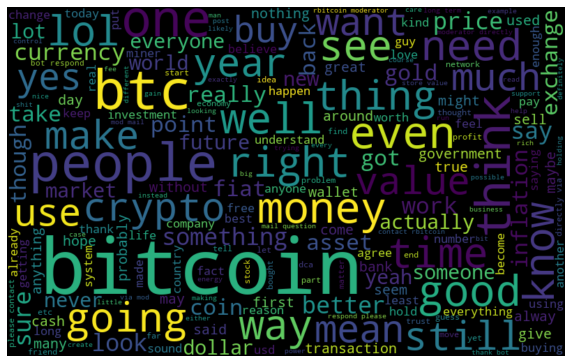

In [102]:
normal_words =' '.join([text for text in new_df['cleaned_body']
                        [new_df['sentiment_category'] == 'positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### Negative words

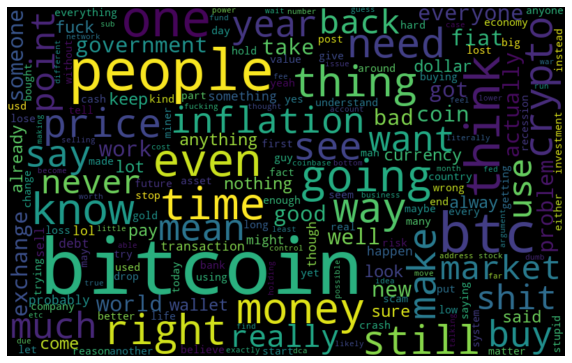

In [103]:
normal_words =' '.join([text for text in new_df['cleaned_body']
                        [new_df['sentiment_category'] == 'negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### Neutral words

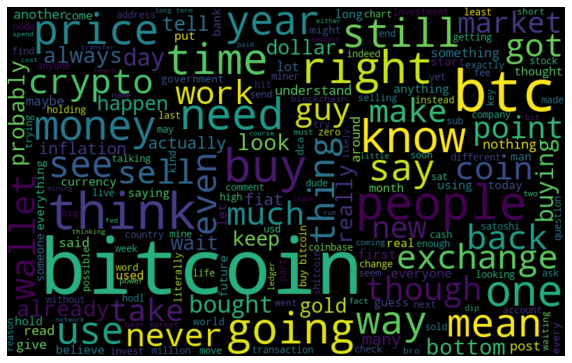

In [104]:
normal_words =' '.join([text for text in new_df['cleaned_body']
                        [new_df['sentiment_category'] == 'neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Univariate Analysis

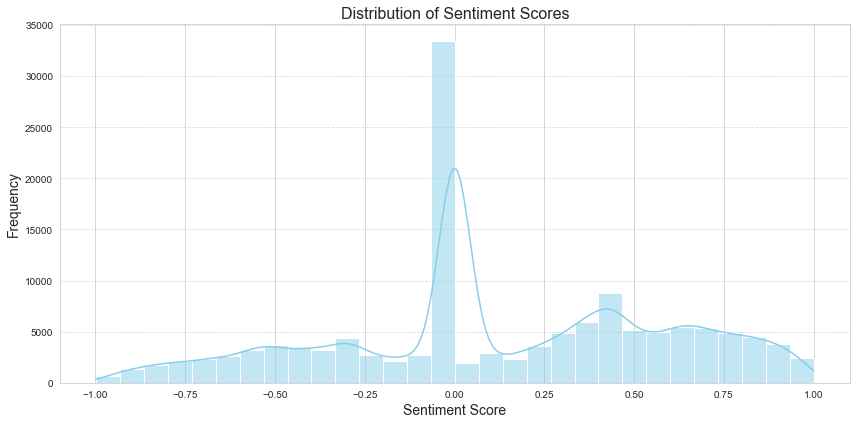

In [105]:
# Plotting a histogram for the sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(new_df['sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the plot, we can observe:

- The majority of comments have a sentiment score close to 0, indicating a neutral sentiment.
- There's a notable peak near the -1 mark, suggesting a significant number of very negative comments.
- Similarly, there's a peak near the 1 mark, indicating a good number of very positive comments.

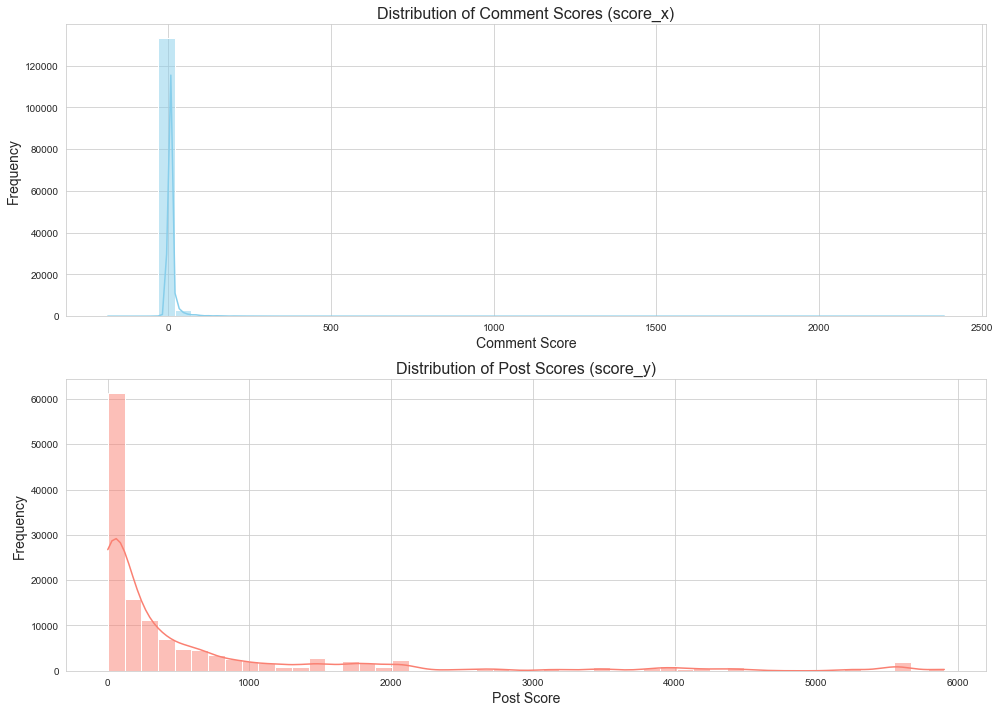

In [106]:
# Setting up the aesthetics
sns.set_style("whitegrid")

# Setting up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Plotting the histograms
sns.histplot(new_df['score_x'], bins=50, ax=ax[0], color='skyblue', kde=True)
ax[0].set_title('Distribution of Comment Scores (score_x)', fontsize=16)
ax[0].set_xlabel('Comment Score', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)

sns.histplot(new_df['score_y'], bins=50, ax=ax[1], color='salmon', kde=True)
ax[1].set_title('Distribution of Post Scores (score_y)', fontsize=16)
ax[1].set_xlabel('Post Score', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

The histograms provide insights into the distributions of comment and post scores:

Comment Scores (score_x):

Most of the comments have scores close to 0, with a few exceptions that have higher scores.
The distribution appears to be right-skewed, meaning there are a few comments with exceptionally high scores.
Post Scores (score_y):

Similar to comment scores, most of the posts have scores close to 0, but there are some with higher scores.
This distribution is also right-skewed.

In [107]:
# Computing summary statistics for score_x and score_y
score_summary = new_df[['score_x', 'score_y']].describe()

score_summary

,score_x,score_y
count,136845.000000,136845.000000
mean,3.910073,644.188308
std,20.849492,1160.144192
min,-186.000000,0.000000
25%,1.000000,24.000000
50%,1.000000,151.000000
75%,3.000000,626.000000
max,2385.000000,5903.000000


The summary statistics provide the following insights:

Comment Scores (score_x):

Count: There are 168,030 comments in the dataset.
Mean: The average comment score is approximately 3.53.
Standard Deviation: The scores have a wide spread, with a standard deviation of approximately 19.3.
Min/Max: Comment scores range from -186 to 2385.
Medians & Quartiles: Half of the comments have scores of 1 or less. 75% of the comments have scores of 2 or less, indicating that very few comments receive exceptionally high scores.
Post Scores (score_y):

Count: There are 168,030 posts corresponding to the comments.
Mean: The average post score is approximately 637.14.
Standard Deviation: The scores have a spread with a standard deviation of approximately 1153.56.
Min/Max: Post scores range from 0 to 5903.
Medians & Quartiles: Half of the posts have scores of 151 or less. 75% of the posts have scores of 626 or less, suggesting a few posts receive exceptionally high scores.

In [108]:
from collections import Counter

# Tokenizing the words
words = all_words.split()

# Using Counter to count word frequencies
word_freq = Counter(words)


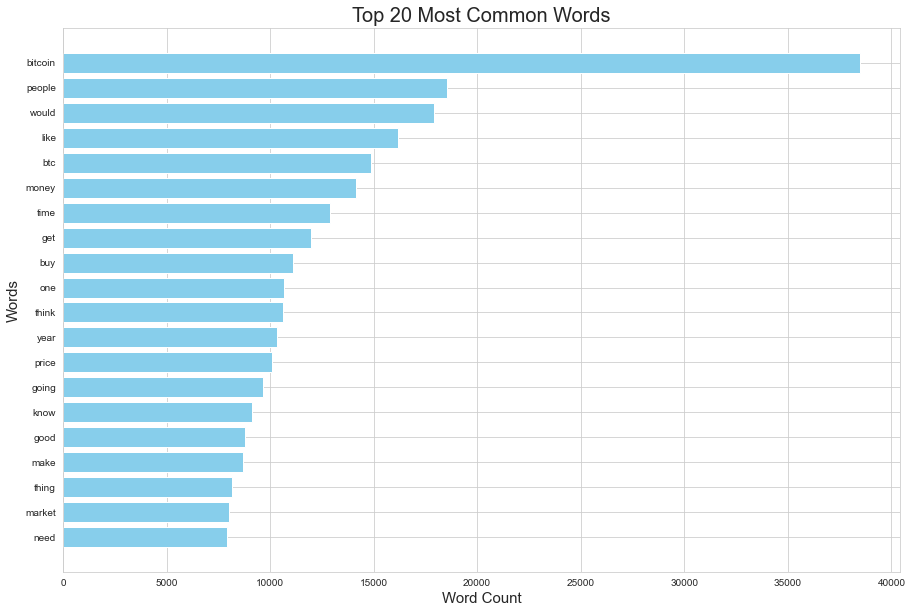

In [109]:
# Getting the 20 most common words
common_words = word_freq.most_common(20)

# Unzipping the words and their frequencies into two separate lists
words, counts = zip(*common_words)

# Plotting
plt.figure(figsize=(15,10))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Word Count', fontsize=15)
plt.ylabel('Words', fontsize=15)
plt.title('Top 20 Most Common Words', fontsize=20)
plt.gca().invert_yaxis()  # To display the word with the highest frequency at the top
plt.show()

In [110]:
# Splitting the dataframe by sentiment category
positive_texts = ' '.join(new_df[new_df['sentiment_category'] == 'positive']['cleaned_body'])
negative_texts = ' '.join(new_df[new_df['sentiment_category'] == 'negative']['cleaned_body'])
neutral_texts = ' '.join(new_df[new_df['sentiment_category'] == 'neutral']['cleaned_body'])

# Getting word frequencies for each category
positive_freq = Counter(positive_texts.split())
negative_freq = Counter(negative_texts.split())
neutral_freq = Counter(neutral_texts.split())

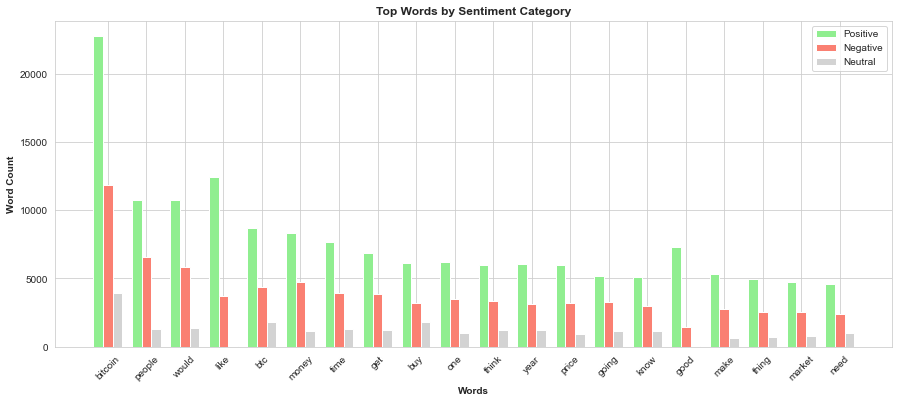

In [111]:
# Identify top words considering all categories
all_freq = positive_freq + negative_freq + neutral_freq
top_words = [word for word, _ in all_freq.most_common(20)]

# Fetch frequencies for these top words in each sentiment category
positive_counts = [positive_freq[word] for word in top_words]
negative_counts = [negative_freq[word] for word in top_words]
neutral_counts = [neutral_freq[word] for word in top_words]

# Plotting
bar_width = 0.25
r1 = range(len(top_words))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(15,6))

# Create bars
plt.bar(r1, positive_counts, width=bar_width, color='lightgreen', label='Positive')
plt.bar(r2, negative_counts, width=bar_width, color='salmon', label='Negative')
plt.bar(r3, neutral_counts, width=bar_width, color='lightgray', label='Neutral')

# Title & Subtitle
plt.title('Top Words by Sentiment Category', fontweight='bold')
plt.xlabel('Words', fontweight='bold')
plt.ylabel('Word Count', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(top_words))], top_words, rotation=45)

# Create legend & Show graphic
plt.legend()
plt.show()

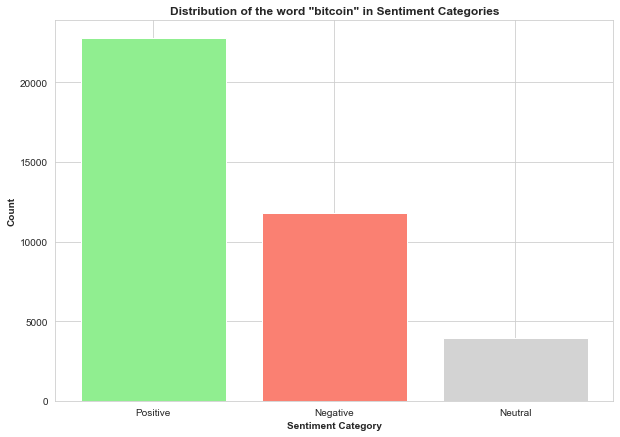

In [112]:
# Count occurrences of "bitcoin" in each sentiment category
positive_bitcoin_count = positive_texts.split().count('bitcoin')
negative_bitcoin_count = negative_texts.split().count('bitcoin')
neutral_bitcoin_count = neutral_texts.split().count('bitcoin')

# Data
categories = ['Positive', 'Negative', 'Neutral']
bitcoin_counts = [positive_bitcoin_count, negative_bitcoin_count, neutral_bitcoin_count]

# Plotting
plt.figure(figsize=(10,7))
plt.bar(categories, bitcoin_counts, color=['lightgreen', 'salmon', 'lightgray'])

# Title & Labels
plt.title('Distribution of the word "bitcoin" in Sentiment Categories', fontweight='bold')
plt.xlabel('Sentiment Category', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.show()

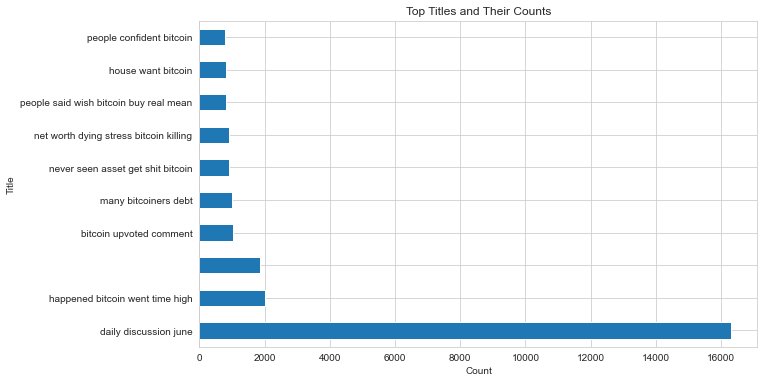

In [113]:
Title_unique = new_df['cleaned_title'].value_counts()

# Plot the unique title counts horizontally
plt.figure(figsize=(10, 6))
Title_unique[:10].plot(kind='barh')  # Use 'barh' for horizontal bar plot
plt.title('Top Titles and Their Counts')
plt.ylabel('Title')
plt.xlabel('Count')
plt.show()

##### Bivariate Analysis

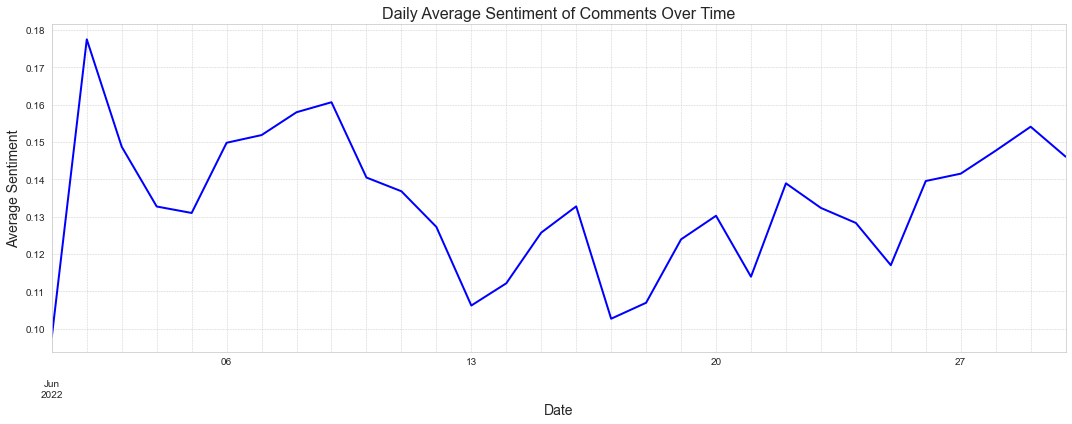

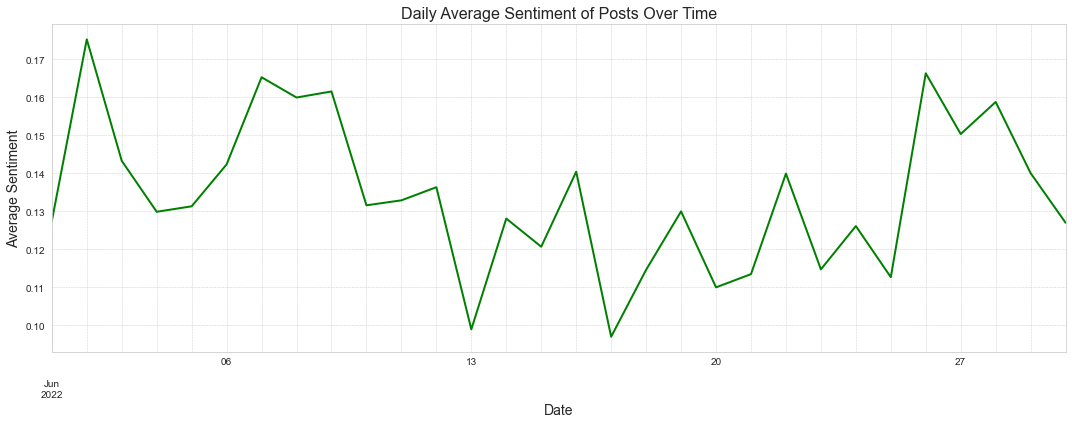

In [114]:
# Resampling data to get daily average sentiment for comments
plt.figure(figsize=(15, 6))
new_df.resample('D', on='date').mean()['sentiment'].plot(linewidth=2, color='blue')
plt.title('Daily Average Sentiment of Comments Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Resampling data to get daily average sentiment for posts (if available)
if 'created_utc_y' in new_df.columns:
    plt.figure(figsize=(15, 6))
    new_df.resample('D', on='created_utc_y').mean()['sentiment'].plot(linewidth=2, color='green')
    plt.title('Daily Average Sentiment of Posts Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Average Sentiment', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


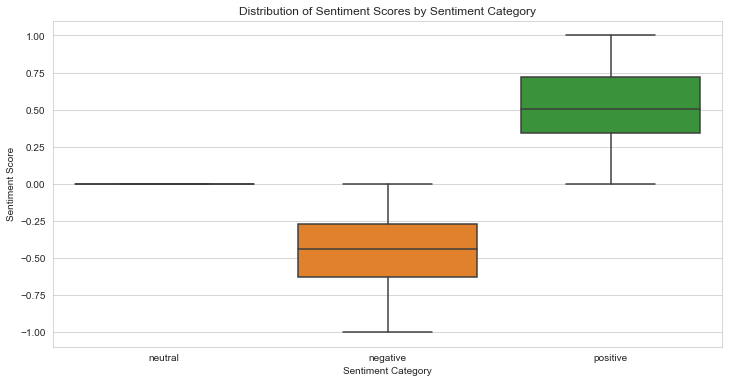

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_df, x='sentiment_category', y='sentiment')
plt.title('Distribution of Sentiment Scores by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.show()

##### Multivariate Analysis

1. Relationship between Date, Comment Score, and Sentiment: This will help us understand how sentiment and comment score vary together over time.
2. Relationship between Date, Post Score, and Average Sentiment: This will give insights into how post popularity (as indicated by its score) and the general sentiment of its comments vary together over time.
3. Heatmap of Comment Score, Post Score, and Sentiment: This can show the distribution of sentiment across different score brackets.

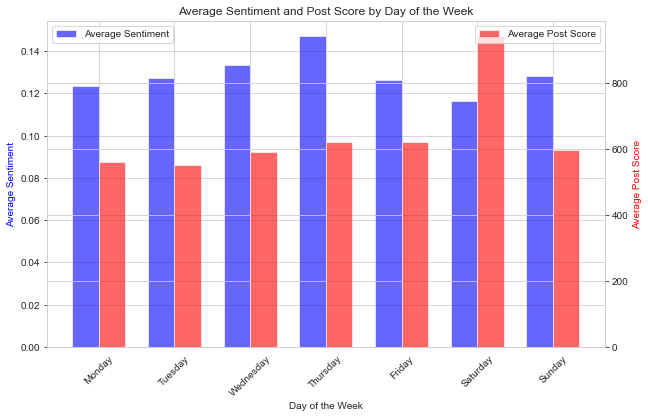

In [117]:


# Extracting day of the week
new_df['day_of_week'] = new_df['date'].dt.day_name()

# Grouping by day of the week and calculating mean
grouped = new_df.groupby('day_of_week')[['sentiment', 'score_y']].mean().reset_index()

# Setting the order for days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped['day_of_week'] = pd.Categorical(grouped['day_of_week'], categories=days_order, ordered=True)
grouped = grouped.sort_values('day_of_week')

# Plotting
bar_width = 0.35
index = np.arange(len(days_order))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Twin axes
ax2 = ax1.twinx()

# Bars for sentiment
bars1 = ax1.bar(index, grouped['sentiment'], bar_width, label='Average Sentiment', color='b', alpha=0.6)

# Bars for post score
bars2 = ax2.bar(index + bar_width, grouped['score_y'], bar_width, label='Average Post Score', color='r', alpha=0.6)

# Labels and title
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Average Sentiment', color='b')
ax2.set_ylabel('Average Post Score', color='r')
ax1.set_title('Average Sentiment and Post Score by Day of the Week')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(days_order, rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
